<a href="https://colab.research.google.com/github/Givemeeee/probable-fiesta/blob/main/%E3%80%8C20231112_%E9%A0%90%E6%B8%AC%E6%88%BF%E5%83%B9_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/gdrive') # 此處需要登入google帳號

Mounted at /content/gdrive


#1.匯入資料

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("/content/kc_house_data.csv")
#讀進來的變數名稱(data)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data=data.copy()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#Dropping id and date column as they are not of any significance in predicting price
data = data.drop(['id', 'date'], axis = 1)

In [7]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#Finding categorical and numerical columns
#使用套件時，注意讀進來的變數命稱!
categorical_columns = []

for i in data.columns:
  unique_values = len(pd.unique(data[i]))
  if unique_values < 90:
    print(f"Unique values in {i} are {len(pd.unique(data[i]))}")
    categorical_columns.append(i)
print('Categorical Columns', categorical_columns)
print('No. of categorical columns',len(categorical_columns))

Unique values in bedrooms are 12
Unique values in bathrooms are 29
Unique values in floors are 6
Unique values in waterfront are 2
Unique values in view are 5
Unique values in condition are 5
Unique values in grade are 11
Unique values in yr_renovated are 70
Unique values in zipcode are 70
Categorical Columns ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode']
No. of categorical columns 9


length after flatten 10
Axes(0.125,0.747241;0.352273x0.132759)


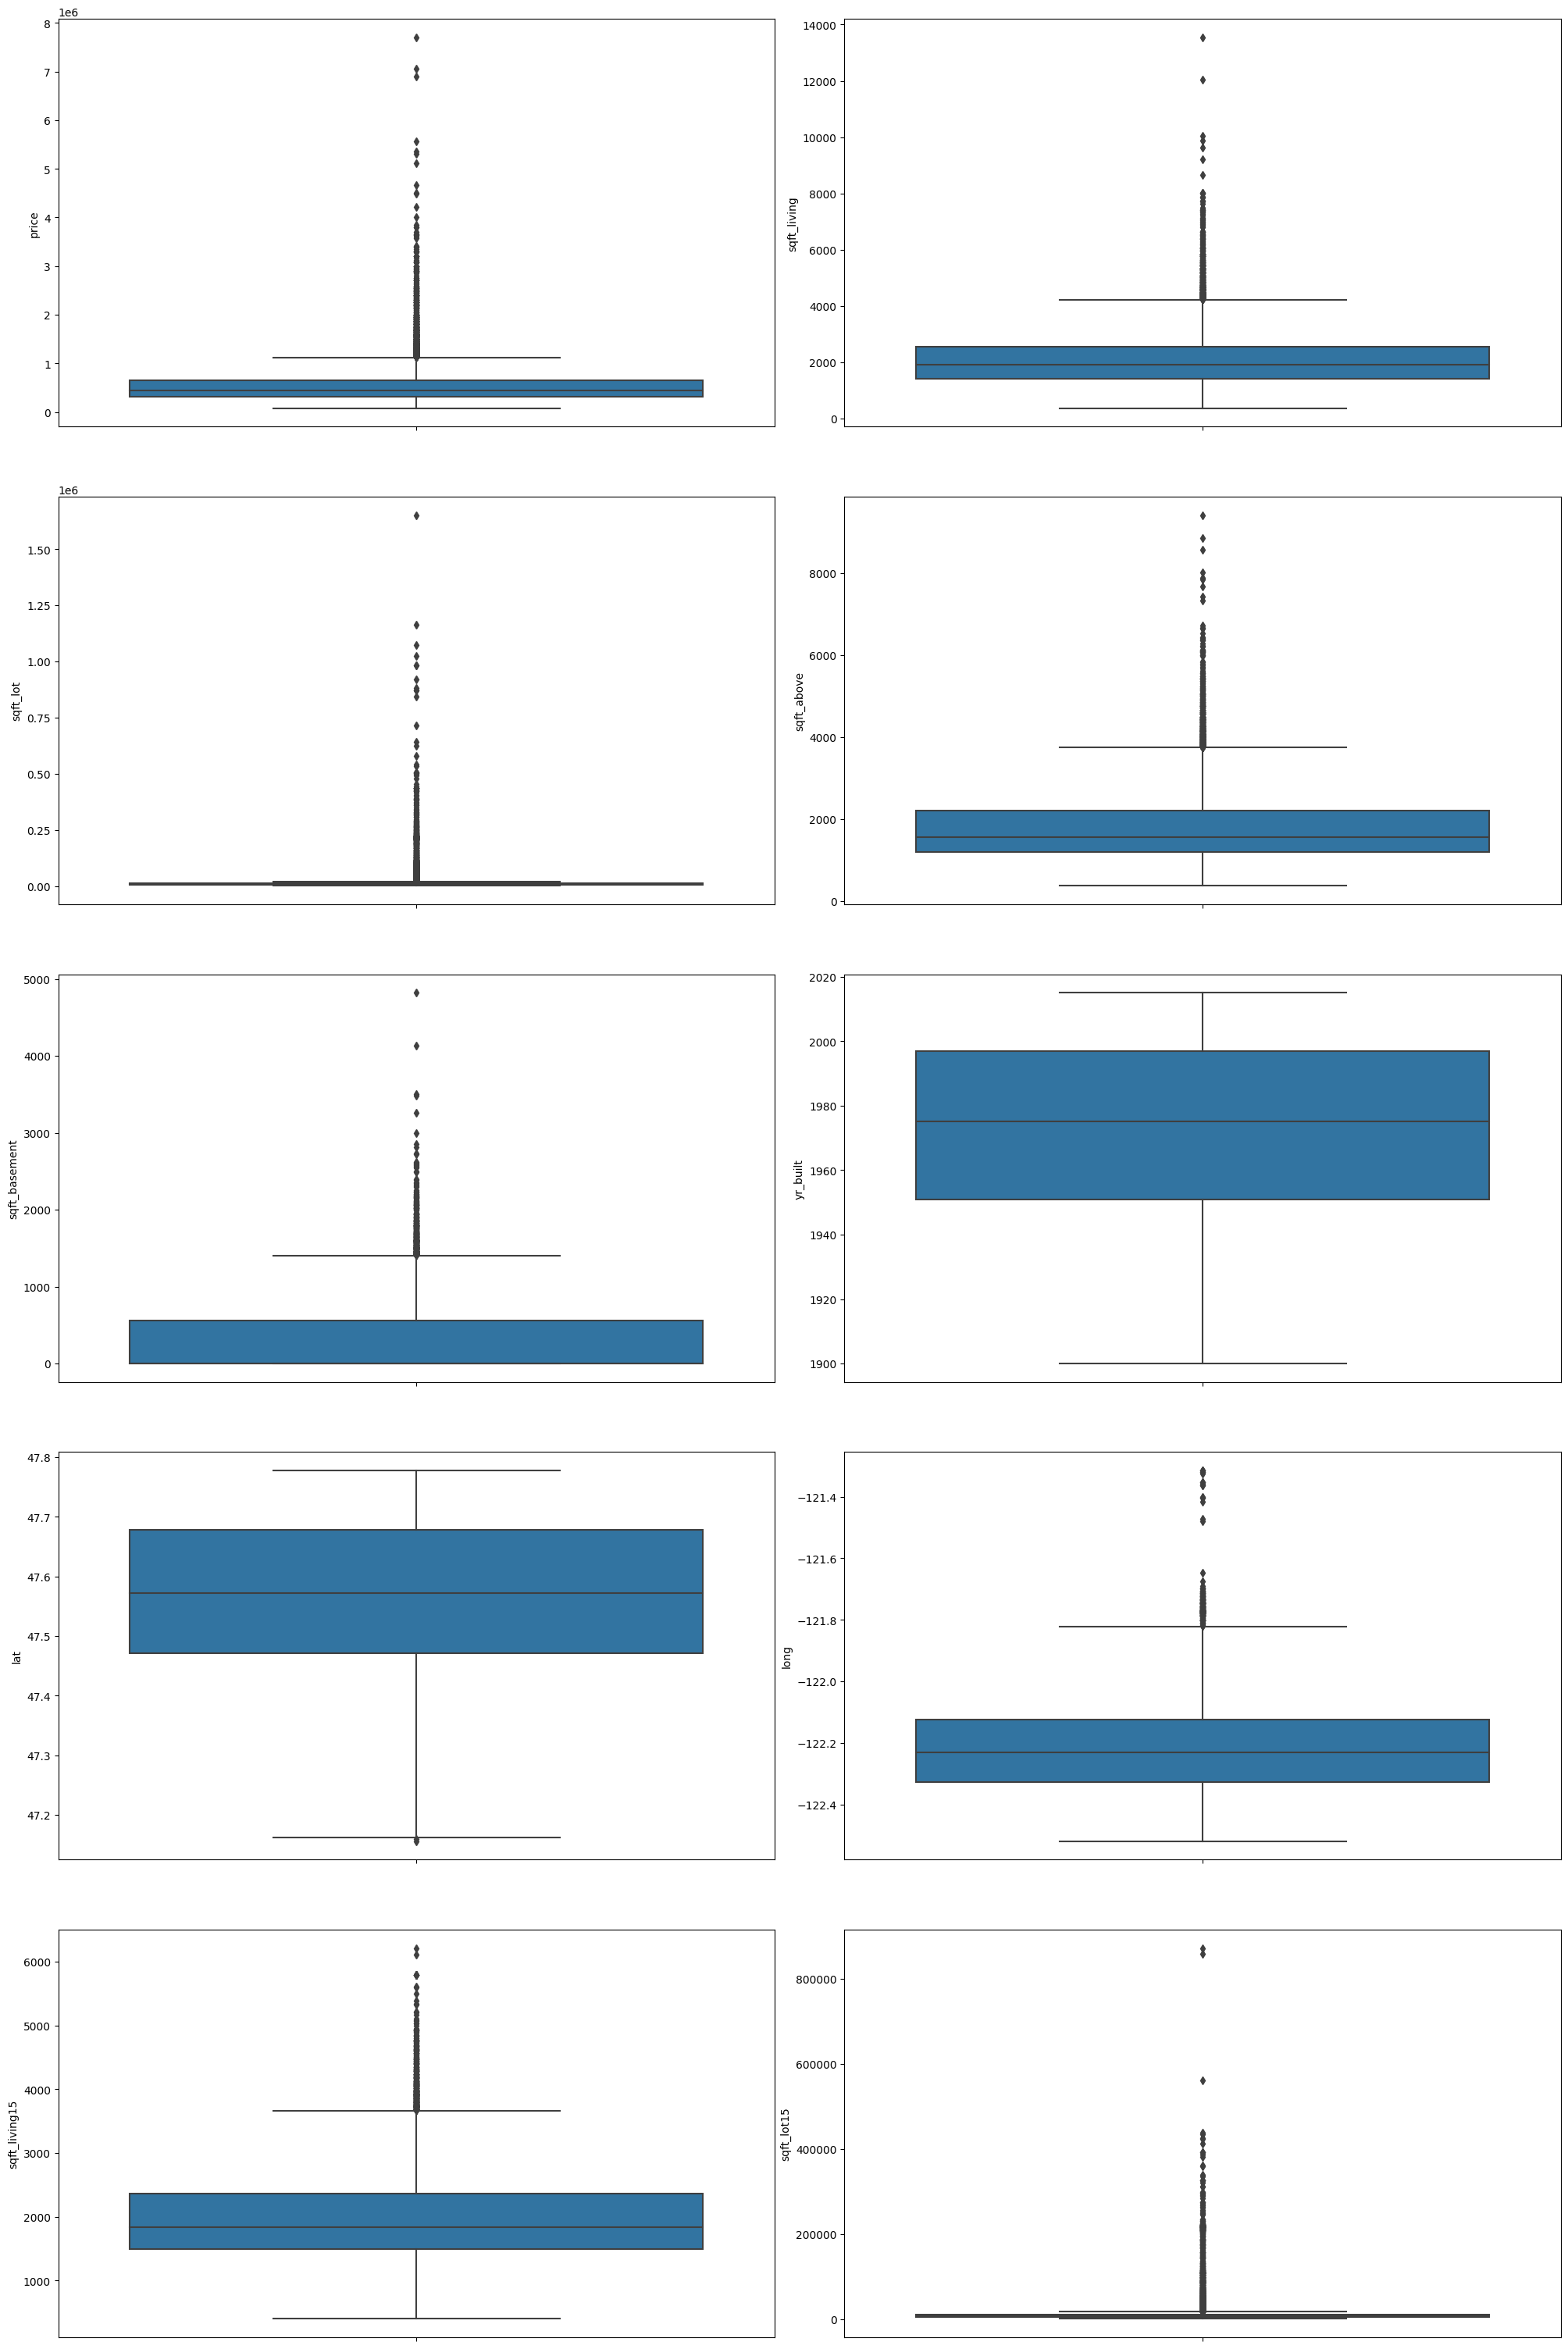

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#使用套件時，注意讀進來的變數命稱!
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(20, 30)) #specifies how many diagrams we want is each row
index = 0

axs = axs.flatten()
print('length after flatten', len(axs))
print(axs[index])
for k,v in data.items():
    if k not in categorical_columns:
        sns.boxplot(y=k, data=data, ax=axs[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0) #adjusting padding between figures

In [10]:
#Calculating percentage outlier in all numerical columns
#使用套件時，注意讀進來的變數命稱!
for column in data.columns:

    if column not in categorical_columns:
        count = 0
        column_array = np.array(sorted(list(data[column])))
        q1 = np.percentile(column_array, 25)
        q3 = np.percentile(column_array, 75)
        iqr =  q3 - q1
        for i in column_array:
            if i < (q1 - 1.5*iqr):
                count +=1
            elif i > (q3 + 1.5*iqr):
                count +=1

        print(f'Total outliers in {column} = {((count/len(column_array)) * 100)}%')

Total outliers in price = 5.361855813307404%
Total outliers in sqft_living = 2.643885724869195%
Total outliers in sqft_lot = 11.200629717090337%
Total outliers in sqft_above = 2.824466361068667%
Total outliers in sqft_basement = 2.2966152706394407%
Total outliers in yr_built = 0.0%
Total outliers in lat = 0.009260545446126776%
Total outliers in long = 1.180719544381164%
Total outliers in sqft_living15 = 2.51423808862342%
Total outliers in sqft_lot15 = 10.131036718062694%


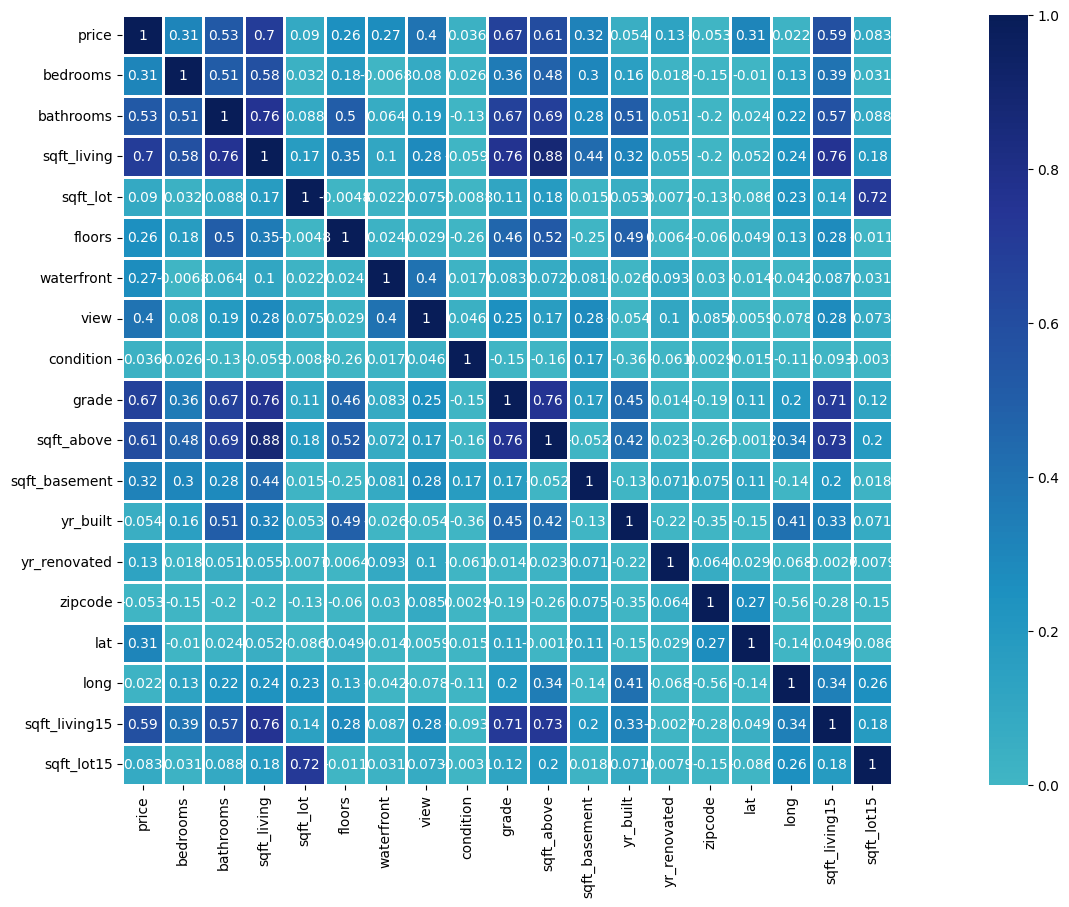

In [11]:
#Plotting correlation
#使用套件時，注意讀進來的變數命稱!
corrMatrix = data.corr()
plt.figure(figsize=(25,10)) # Plotting the figure of required size
ax = sns.heatmap(corrMatrix, vmin=0, vmax=1, center=0, annot=True,
                 cmap="YlGnBu", linewidths = 1.0,
                 square=True)

plt.show()

# 線性模型

In [12]:
from sklearn import linear_model

In [13]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 41)

In [16]:
regression = linear_model.LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

#評估模型

In [17]:
Y_pred = regression.predict(X_test)

In [18]:
Y_pred[:]

array([643102.74226502, 763262.09214546, 976858.28392582, ...,
       806388.48557603, 264219.861076  , 291842.03653556])

In [19]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))

127881.37631251759
39996026275.473595


In [20]:
MSE = np.square(np.subtract(Y_test,Y_pred)).mean()
print(MSE)

39996026275.473595
